In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from datetime import datetime

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [10]:
sales_data=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Python Foundation Case Study 4 - Python Visualization Case Study/SalesData.csv")
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


<AxesSubplot:xlabel='Region'>

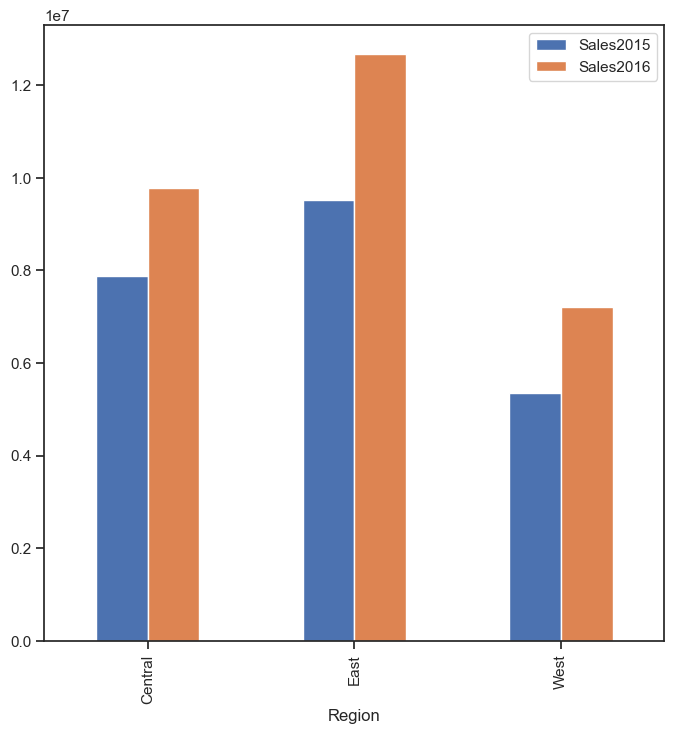

In [12]:
#Q1: Compare Sales by region for 2016 with 2015 using bar chart
sales_region=sales_data.groupby('Region')[['Sales2015','Sales2016']].sum()

sales_region
sales_region.plot(kind="bar",figsize=(8,8))


([<matplotlib.patches.Wedge at 0x20e26fe24c0>,
 [Text(0.5601010868342193, 0.9467242325657068, 'Central'),
  Text(-1.0592536758623574, -0.2966170092426997, 'East'),
  Text(0.7946396777498894, -0.7606232855662204, 'West')],
 [Text(0.305509683727756, 0.516395035944931, '33%'),
  Text(-0.5777747322885586, -0.16179109595056343, '43%'),
  Text(0.43343982422721233, -0.4148854284906656, '24%')])

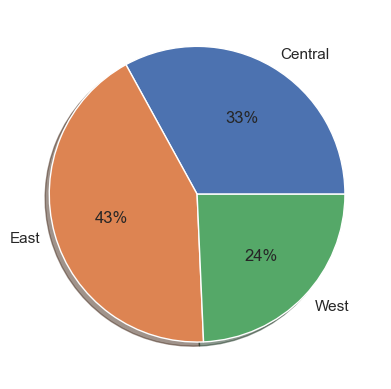

In [32]:
#Q2)
sales_2016=sales_data.groupby('Region')['Sales2016'].sum().round()
sales_2016
plt.pie(sales_2016,autopct='%1.0f%%',labels=["Central","East","West"], shadow=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9464\883889504.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_tier=sales_data.groupby(['Region','Tier'])['Sales2015','Sales2016'].sum()


<AxesSubplot:xlabel='Region,Tier'>

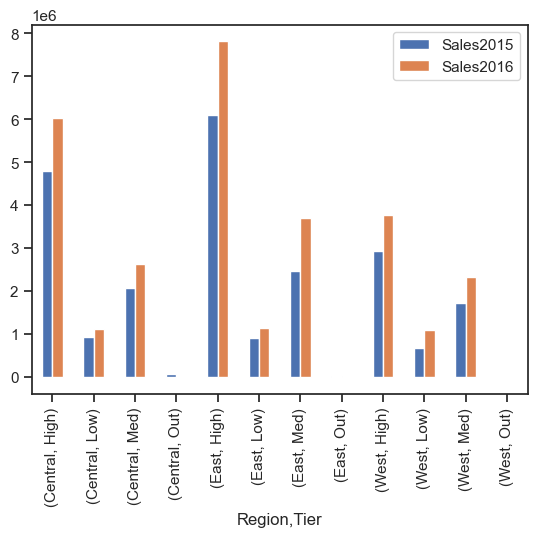

In [38]:
#Q3
region_tier=sales_data.groupby(['Region','Tier'])['Sales2015','Sales2016'].sum()
region_tier
region_tier.plot(kind='bar')

C:\Users\hp\AppData\Local\Temp\ipykernel_9464\953890544.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_east_plot=sales_east.groupby('State')['Sales2015','Sales2016'].sum()


<AxesSubplot:xlabel='State'>

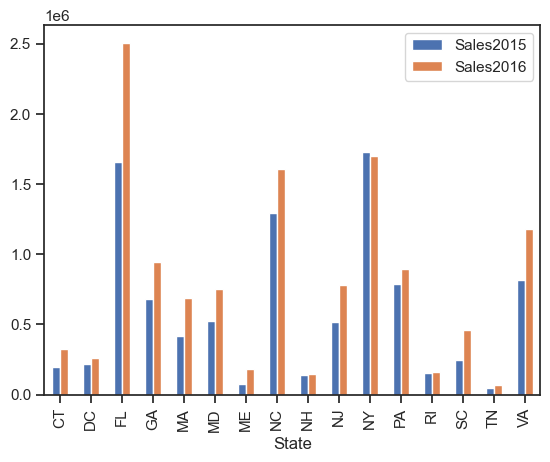

In [57]:
#Q4
sales_east=sales_data.loc[(sales_data['Region']=='East')]
sales_east
sales_east_plot=sales_east.groupby('State')['Sales2015','Sales2016'].sum()
sales_east_plot
sales_east_plot.plot(kind='bar')
#as we can observe from the graph shown below, sales in NY has reduced from 2015 to 2016

C:\Users\hp\AppData\Local\Temp\ipykernel_9464\1424494672.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  high_tier_plot=high_tier.groupby('Division')['Sales2015','Sales2016'].sum()


<AxesSubplot:xlabel='Division'>

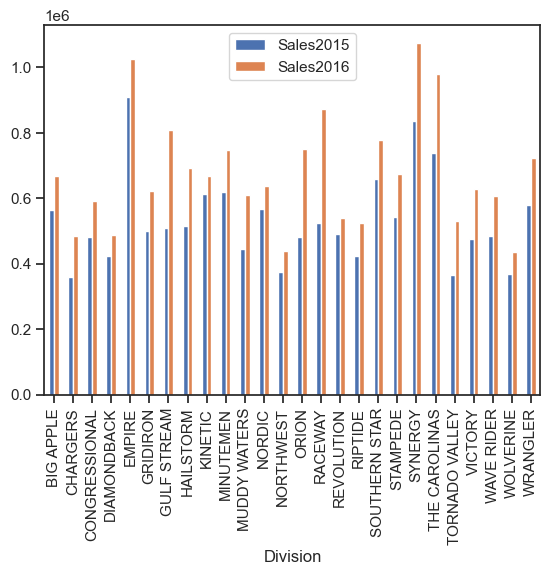

In [64]:
#Q5
high_tier=sales_data.loc[(sales_data['Tier']=='High')]
high_tier_plot=high_tier.groupby('Division')['Sales2015','Sales2016'].sum()
high_tier_plot.plot(kind='bar')
#from the below graph, it can be observed that no division in high tier saw a decline in sales from 2015 to 2016


In [66]:
#Q6
month =sales_data["Month"]

quarter = []
for x in month :
    if x in ["Jan","Feb","Mar"]:
        quarter.append("Q1")
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [70]:
sales_data['Qtr']=pd.Series(quarter)
sales_data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


C:\Users\hp\AppData\Local\Temp\ipykernel_9464\816845834.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quarter_sales=sales_data.groupby('Qtr')['Sales2015','Sales2016'].sum().round()


<AxesSubplot:xlabel='Qtr'>

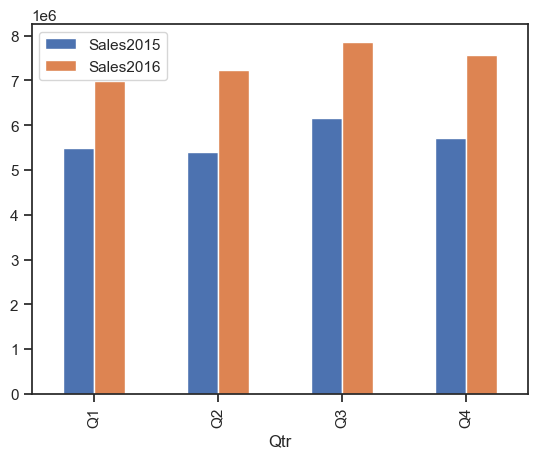

In [75]:
#Q7
quarter_sales=sales_data.groupby('Qtr')['Sales2015','Sales2016'].sum().round()
quarter_sales
quarter_sales.plot(kind='bar')

In [110]:
#Q8
tier_quar=sales_data.groupby(['Qtr','Tier'])['Sales2016'].sum().round().reset_index(name='Sales')
tier_quar
tier_quar_pivot = tier_quar.pivot_table(index='Qtr',columns='Tier',values='Sales')
tier_quar_pivot



Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867719.0,948833.0,2181402.0,0.0
Q2,4130953.0,890595.0,2215814.0,0.0
Q3,4872559.0,795178.0,2197058.0,-3249.0
Q4,4740002.0,742659.0,2085207.0,0.0


In [ ]:
plt.pie(x=tier_quar_pivot.loc["Q1",:],autopct="%1.0f%%",labels=['High','Low','Medium','Out'])


In [ ]:
plt.pie(x=tier_quar_pivot.loc["Q2",:],autopct="%1.0f%%",labels=['High','Low','Medium','Out'])


In [ ]:
plt.pie(x=tier_quar_pivot.loc["Q3",:],autopct="%1.0f%%",labels=['High','Low','Medium','Out'])


In [ ]:
plt.pie(x=tier_quar_pivot.loc["Q4",:],autopct="%1.0f%%",labels=['High','Low','Medium','Out'])
